# Explainable AI

Explainable AI (XAI) refers to methods and techniques in artificial intelligence that make the results of AI systems understandable to human experts. As AI systems become more complex and are deployed in critical domains like healthcare, finance, and criminal justice, the ability to explain and interpret their decisions becomes crucial.

## Why is Explainable AI important?

**Trust**: Users need to understand how AI systems make decisions to trust them

**Fairness**: Explanation helps detect and prevent biases in AI systems

**Bug detection**: Understanding model behavior helps detect if our results, even when they make sense, are the result of a bug. 

**Knowledge Discovery**: Models may reveal new insights about the data

In this notebook, we'll explore a simple example of model interpretation using a Support Vector Classifier on the Iris dataset.

# Explore model weights

In [ ]:
# Import necessary libraries for the whole notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

variety_to_exclude = 2   # We need to explude one of the three varieties

# Keep only two classes
X = X[y != variety_to_exclude]
y = y[y != variety_to_exclude]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

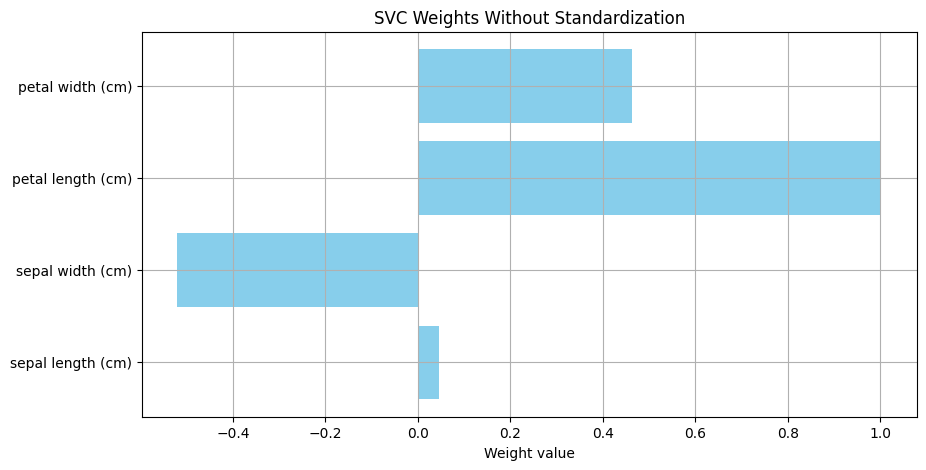

Raw data - Training accuracy: 1.00
Raw data - Test accuracy: 1.00


In [2]:
# Train SVC on raw (unscaled) data
svc_raw = SVC(kernel='linear', C=1.0, random_state=42)
svc_raw.fit(X_train, y_train)

# Plot weights
plt.figure(figsize=(10, 5))
weights_raw = svc_raw.coef_[0]
plt.barh(feature_names, weights_raw, color='skyblue')
plt.xlabel('Weight value')
plt.title('SVC Weights Without Standardization')
plt.grid(True)
plt.show()

# Print performance
print(f"Raw data - Training accuracy: {svc_raw.score(X_train, y_train):.2f}")
print(f"Raw data - Test accuracy: {svc_raw.score(X_test, y_test):.2f}")

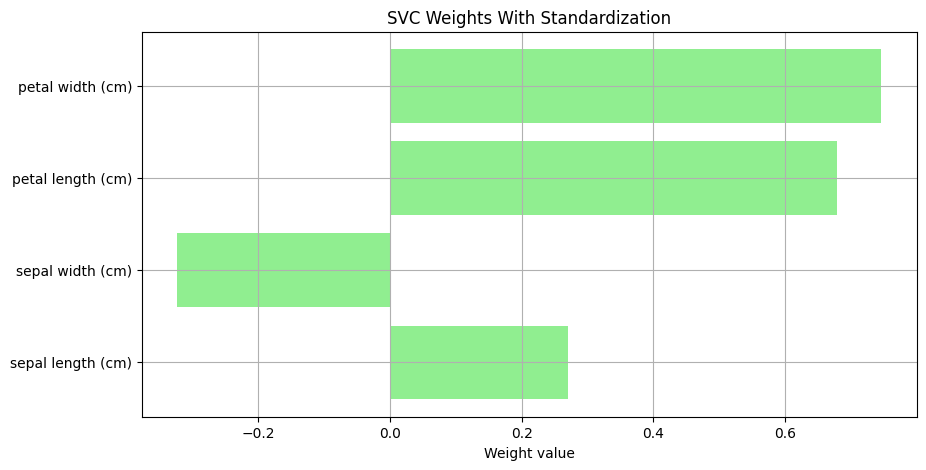

Scaled data - Training accuracy: 1.00
Scaled data - Test accuracy: 1.00


In [3]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVC on standardized data
svc_scaled = SVC(kernel='linear', C=1.0, random_state=42)
svc_scaled.fit(X_train_scaled, y_train)

# Plot weights
plt.figure(figsize=(10, 5))
weights_scaled = svc_scaled.coef_[0]
plt.barh(feature_names, weights_scaled, color='lightgreen')
plt.xlabel('Weight value')
plt.title('SVC Weights With Standardization')
plt.grid(True)
plt.show()

# Print performance
print(f"Scaled data - Training accuracy: {svc_scaled.score(X_train_scaled, y_train):.2f}")
print(f"Scaled data - Test accuracy: {svc_scaled.score(X_test_scaled, y_test):.2f}")

## Plots!

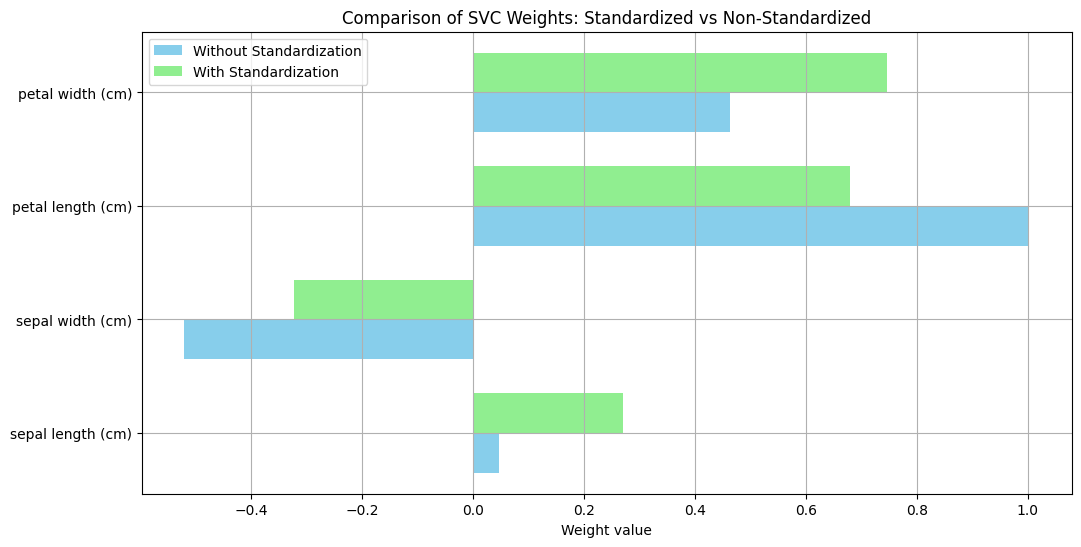

In [4]:
# Comparative plot
x = np.arange(len(feature_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.barh(x - width/2, weights_raw, width, label='Without Standardization', color='skyblue')
rects2 = ax.barh(x + width/2, weights_scaled, width, label='With Standardization', color='lightgreen')

ax.set_yticks(x)
ax.set_yticklabels(feature_names)
ax.set_xlabel('Weight value')
ax.set_title('Comparison of SVC Weights: Standardized vs Non-Standardized')
ax.legend()
ax.grid(True)

plt.show()